МІНІСТЕРСТВО ОСВІТИ І НАУКИ, МОЛОДІ ТА СПОРТУ УКРАЇНИ
НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
«КИЇВСЬКИЙ ПОЛІТИХНІЧНИЙ ІНСТИТУТ ІМ.ІГОРЯ СІКОРСЬКОГО»
ФІЗИКО-ТЕХНІЧНИЙ ІНСТИТУТ


Лабораторна робота №3
«Побудова фракталів з використанням L-систем»
Варіант 9





Виконав:                                                                     Студент 2 курсу
     Групи ФІ-21
Климентьєв Максим




Київ 2024

In [33]:
import matplotlib.pyplot as plt
import numpy as np

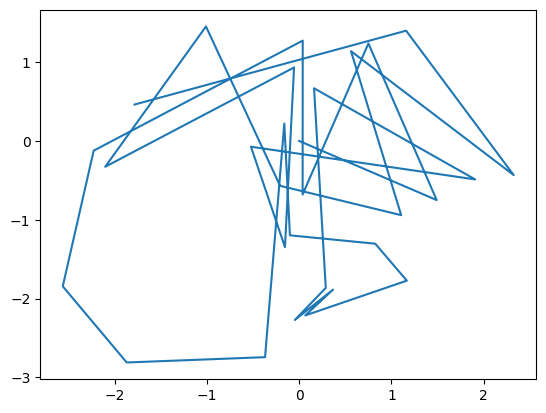

In [137]:
class Fractal:
    def __init__(self, set_of_parameters, iter=1, size=1000):
        self.size = len(set_of_parameters)
        self.index = 0
        self.cycles = 1
        self.xy = None
        if self.size == 7:
            self.a, self.b, self.c, self.d, self.e, self.f, self.p = set_of_parameters
        else:
            self.a, self.b, self.c, self.d, self.e, self.f = set_of_parameters
            self.p = [1/self.a.__len__()] * self.a.__len__()
        self.set_size = len(self.p)
        self.create_data_for_fractal(iter)
        self.plot_fractal()
    
    def create_data_for_fractal(self, iterations=1):
        # variant = np.random.choice(self.set_size, 1, p=self.p)
        # variant = variant[0]
        for iteration in range(iterations):
            
            variant = np.random.choice(self.set_size, 1, p=self.p)
            variant = variant[0]
            
            if self.xy is None:
                self.xy = np.array(
                        [[0.0, 0.0]]*(self.size)
                )
            else:
                self.xy = np.concatenate((self.xy, np.array(
                    [[0.0, 0.0]]*(self.size)
                )))
            # self.xy[0] = [1, 1]
            # print(self.index, self.size*self.cycles)
            while self.index < self.size*self.cycles-1:
            # for i in range(self.xy.shape[0]-1):
                variant = np.random.choice(self.set_size, 1, p=self.p)
                variant = variant[0]
                xk = self.a[variant]*self.xy[self.index, 0] + self.b[variant]*self.xy[self.index, 1] + self.e[variant]
                yk = self.c[variant]*self.xy[self.index, 0] + self.d[variant]*self.xy[self.index, 1] + self.f[variant]
                self.xy[self.index+1] = [xk, yk]
                self.index += 1
                # print(self.index, self.size*self.cycles)
            self.cycles += 1
            # print(self.xy)

    def plot_fractal(self):
        fig, ax = plt.subplots()
        ax.plot(self.xy[:, 0], self.xy[:, 1])
        plt.show()
    
Fractal([
    [0.1400, 0.4300, 0.4500, 0.4900],
    [0.0100, 0.5200, -0.4900, 0.0000],
    [0.0000, -0.4500, 0.4700, 0.0000],
    [0.5100, 0.5000, 0.4700, 0.5100],
    [-0.0800, 1.4900, -1.6200, 0.0200],
    [-1.3100, -0.7500, -0.7400, 1.6200],
], 5)